In [1]:
from random import random,randint,shuffle
from scipy.stats import expon
from math import exp
import matplotlib.pyplot as plt


In [2]:
size = 102
area = size*size
flag = False
exps=[]
rnds=[]

In [3]:
def pos(x,y):
    global size
    return y*size + x

In [4]:
def coordinates(pos):
    global size
    y = pos// size
    x = pos - y * size
    return x , y

In [5]:
def sector_factory(pos,occupied,habitability,beta):
    x,y = coordinates(pos)
    return{"pos":pos,"occupied":occupied,"habitability":habitability,"beta":beta
           ,"neighbours":[],"x_pos":x,"y_pos":y,"edge":True}

In [6]:
def occupy(sector):
    global flag
    if sector["edge"]:
        flag = False;
    sector["occpied"]=True
    pos = sector["pos"]
    all_ccs.add(pos)
    for i in sector["neighbours"]:
        if pos in space[i]["neighbours"]:
            space[i]["neighbours"].remove(pos)
            
    

In [7]:
def iterate(occupied):
    n_occupied=[]
    l = len(occupied)
    shuffle(occupied)
    for i in range(l):
        z = occupied.pop()
        cc = space[z]
        if len(cc["neighbours"])>0:
            neighbours = cc["neighbours"].copy()
            for n in neighbours:
                ncc = space[n]
                e = exp(-random()*ncc["beta"])
                exps.append(e)
                if ncc["habitability"]<e:
                    occupy(ncc)
                    cc["neighbours"].remove(ncc["pos"])
                    n_occupied.append(ncc["pos"])
        if len(cc["neighbours"])>0:
            n_occupied.append(cc["pos"])
    return n_occupied
                
    

In [8]:
beta = 0
space=[sector_factory(i,False,random(),beta) for i in range(area)]
all_ccs=set()
for x in range(1,size-1):
    for y in range(1,size-1):
        s = space[pos(x,y)]
        s["edge"]=False
        s["neighbours"]=[pos(x+1,y),pos(x-1,y),pos(x,y+1),pos(x,y-1)]
occupied = [5050]
occupy(space[5050])

for s in space:
    rnds.append(s["habitability"])

In [9]:
flag = True
t=0
while flag:
    shuffle(occupied)
    occupied = iterate(occupied)
    t+=1
print(t)

49


In [10]:
x=[]
y=[]
for i in all_ccs:
    x.append(space[i]["x_pos"])
    y.append(space[i]["y_pos"])
    


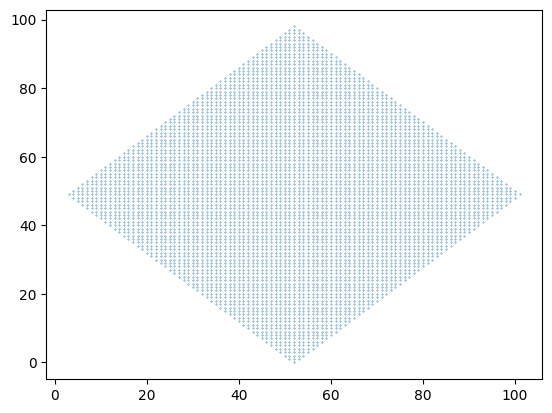

In [11]:
plt.scatter(x,y,[0.1])
plt.show()

In [12]:
len(all_ccs)

4901

(array([   0.,    0.,    0.,    0.,    0., 9604.,    0.,    0.,    0.,
           0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

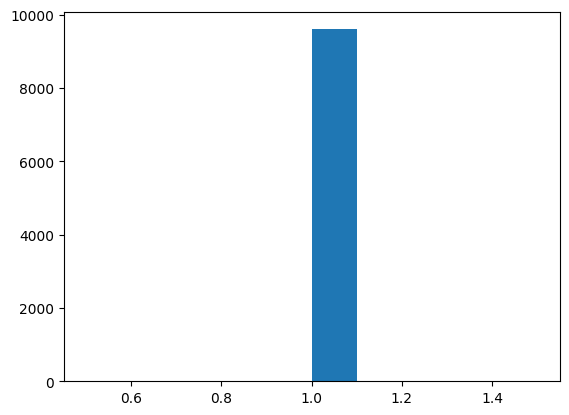

In [13]:
plt.hist(exps)